In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd

**Importing the dataset**

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df=df.drop(columns=["User ID","Gender"])

In [6]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [7]:
x=df.drop(columns=["Purchased"])
y=df.Purchased
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

**Feature Scaling**

In [8]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
model.score(X_test,y_test)

0.8375

**Predicting the Test set results**

In [12]:
lis=model.cost_complexity_pruning_path(X_train, y_train)

In [13]:
alpha=lis["ccp_alphas"][:-1]

In [14]:
models=[]
for i in alpha:
    model = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model.fit(X_train, y_train)
    models.append(model)

In [15]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0010416666666666664, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0017857142857142857, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018435754189944132, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002678571428571429, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002734375, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0027777777777777775, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0029017857142857153, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0038183170995670992, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003910429783334824, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004444444444444444, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0051190476190476186, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005664374003189791, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005984072617109773, random_state=0),
 DecisionTre

**Making the Confusion Matrix**

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid=GridSearchCV(tree.DecisionTreeClassifier(random_state=0),{"ccp_alpha":alpha},cv=10)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00104167, 0.00178571, 0.00184358, 0.00267857,
       0.00273437, 0.00277778, 0.00290179, 0.00381832, 0.00391043,
       0.00444444, 0.00511905, 0.00566437, 0.00598407, 0.01276261,
       0.11442307])})

In [19]:
grid.best_score_

0.909375

**Visualising the Training set results**

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
train_y_pred = model.predict(X_train)
am = confusion_matrix(y_train, train_y_pred)
print(cm)
print(am)

[[49  4]
 [13 14]]
[[190  14]
 [ 33  83]]


Text(42.0, 0.5, 'Truth')

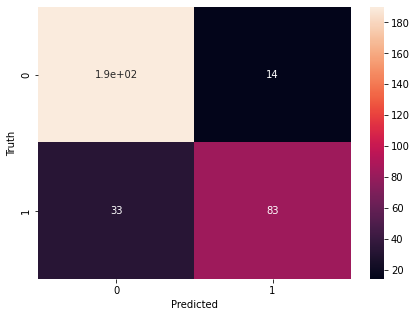

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(am, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**